# Section 2 B - Logistic Regression
Learning Objective: Logistic Regression and Cross Validation.
* Logistic Regression
* Cross Validation
    * Exhaustive cross validation
    * Non-exhaustive cross validation: k-fold cross validation
    
## Logistic Regression Example - Sigmoid function
* Sigmoid function:
    $g(z)=\frac{1}{1+{e}^{-z}}$
* Linear model
    $z=\beta0 + \beta1*x$
* Sigmoid linear function:
    $h_{\beta}(x) = g(z) = \frac{1}{1+{e}^{-(\beta0 + \beta1*x)}}$


The intercept value: [-1.70338898]
The coef value: [[ 0.4572272]]
Predict classifier is [1]
Predict probability is [[ 0.12407126  0.87592874]]
Predict probability with model is [[ 0.87592874]]


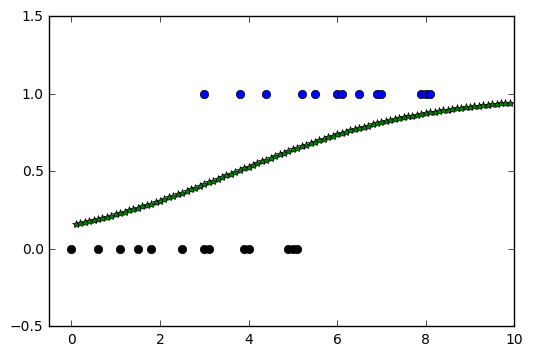

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

# Define the model which is sigmoid function
def model(classifier, x):
    return 1/(1 + np.exp(-(classifier.intercept_ + classifier.coef_*x)))

# Given training data set (x1, y1) & (x2, y2)
x1 = np.array([0,0.6,1.1,1.5,1.8,2.5,3,3.1,3.9,4,4.9,5,5.1])
y1 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
x2 = np.array([3,3.8,4.4,5.2,5.5,6.5,6,6.1,6.9,7,7.9,8,8.1])
y2 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1])

# Merge 2 training data to 1
X = np.array([[0],[0.6],[1.1],[1.5],[1.8],[2.5],[3],[3.1],[3.9],[4],[4.9],[5],[5.1],[3],[3.8],[4.4],[5.2],[5.5],[6.5],[6],[6.1],[6.9],[7],[7.9],[8],[8.1]])
y = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1])

# Plot the training data
plt.plot(x1, y1, 'ro', color='black')
plt.plot(x2, y2, 'ro', color='blue')

# Run the logistic regression
classifier = LogisticRegression()
classifier.fit(X, y)
print "The intercept value:", classifier.intercept_
print "The coef value:", classifier.coef_

# Predict the data with classifier return
pred = classifier.predict(8)
print "Predict classifier is", pred

# Predict the data with probability return
pred_prob = classifier.predict_proba(8)
print "Predict probability is", pred_prob

# Predict the data by using model method
pred_ = model(classifier, 8)
print "Predict probability with model is", pred_

# Plot the sigmoid function as green
for i in range(1, 100, 1):
    plt.plot(i/10.0, model(classifier, i/10.), 'r*', color="green")

# Range the x, y display
plt.axis([-0.5, 10, -0.5, 1.5])
# Show the plot
plt.show()

## Example about logistic regression
Given the training data. Write the program with logistic regression to predict a client can or can't pay back the debt.
Given a person with balance in bank is 5.500 usd, his income 50.000 usd and his age is 25.

| Balance  | Income    | Age | Class | Remark |
| -------- |:---------:|:---:|:-----:|:-------------------------:|
| 10.000   | 80.000    | 35  | 1     | can pay back the debt |
| 7.000    | 120.000   | 57  | 1     | can pay back the debt |
| 100      | 23.000    | 22  | 0     | can NOT pay back the debt |
| 223      | 18.000    | 26  | 0     | can NOT pay back the debt |
| 5.500    | 50.000    | 25  | ???   | Predict |

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.array([[10000,80000,35],[7000,120000,57],[100,23000,22],[223,18000,26]])
y = np.array([1,1,0,0])

classifier = LogisticRegression()
classifier.fit(X, y)

# The predict value is 1 D array
sample = np.array([5500, 50000, 25])
# Have to reshapae allow to understand 1 sample with many features
sample_predict = sample.reshape(1, -1)

print "The prediction is", classifier.predict(sample_predict)

The prediction is [1]


## Logistic Regression Example - Credit Scoring
Read user information about the credit scoring in csv file. Then we extract the needed features to our dataset for classification.

Spit the dataset from the previous step to training dataset and testing dataset. Build model for classification base on logistic regression.

Predict the testing dataset then evaluate them by confusion matrix and accuracy score.

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Read the dataset from csv file
creditData = pd.read_csv("./credit_data.csv")

# Print the dataset information
print "Information of the head dataset"
print creditData.head()
print "********************************************************************************"
print
print "Describe the data"
print creditData.describe()
print "********************************************************************************"
print
print "Correlation of the data"
print creditData.corr()

# Extract the features from dataset
features = creditData[["income", "age", "loan"]]
targetVariable =creditData.default

# Split dataset to training set and testing set
features_train, features_test, target_train, target_test = train_test_split(features, targetVariable, test_size=0.2)

# Build model base on LogisticRegression
model = LogisticRegression()
model.fit(features_train, target_train)

# Prediction the testing dataset
predictions = model.predict(features_test)
print "********************************************************************************"
print
print "Confusion matrix"
print confusion_matrix(target_test, predictions)
print "********************************************************************************"
print
print "The accuracy of the model:", accuracy_score(predictions, target_test)

Information of the head dataset
   clientid        income        age         loan       LTI  default
0         1  66155.925095  59.017015  8106.532131  0.122537        0
1         2  34415.153966  48.117153  6564.745018  0.190752        0
2         3  57317.170063  63.108049  8020.953296  0.139940        0
3         4  42709.534201  45.751972  6103.642260  0.142911        0
4         5  66952.688845  18.584336  8770.099235  0.130989        1
********************************************************************************

Describe the data
          clientid        income          age          loan          LTI  \
count  2000.000000   2000.000000  2000.000000   2000.000000  2000.000000   
mean   1000.500000  45331.600018    40.927143   4444.369695     0.098403   
std     577.494589  14326.327119    13.262450   3045.410024     0.057620   
min       1.000000  20014.489470    18.055189      1.377630     0.000049   
25%     500.750000  32796.459717    29.062492   1939.708847     0.047903  